In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/winequalityN.csv')

print("rows, columns: ", str(df.shape))
df.head()

rows, columns:  (6497, 13)


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Checking the missing values and filling them with means

In [4]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df = df.fillna(df.mean())
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# One-hot encode wine type

In [6]:
type_fig = px.histogram(df,x='type')
type_fig.show()

In [7]:
df['type'] = pd.get_dummies(df['type'])
df['type'].value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [8]:
df.describe()

type  fixed acidity  volatile acidity  citric acid  \
count  6497.000000    6497.000000       6497.000000  6497.000000   
mean      0.246114       7.216579          0.339691     0.318722   
std       0.430779       1.295751          0.164548     0.145231   
min       0.000000       3.800000          0.080000     0.000000   
25%       0.000000       6.400000          0.230000     0.250000   
50%       0.000000       7.000000          0.290000     0.310000   
75%       0.000000       7.700000          0.400000     0.390000   
max       1.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6497.000000  6497.000000          6497.000000           6497.000000   
mean         5.444326     0.056042            30.525319            115.744574   
std          4.757392     0.035031            17.749400             56.521855   
min          0.600000     0.009000             1.000000              6.000000   
25%          1.800000     0.038000            17.000000             77.000000   
50%          3.000000     0.047000            29.000000            118.000000   
75%          8.100000     0.065000            41.000000            156.000000   
max         65.800000     0.611000           289.000000            440.000000   

           density           pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      0.994697     3.218395     0.531215    10.491801     5.818378  
std       0.002999     0.160637     0.148768     1.192712     0.873255  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.992340     3.110000     0.430000     9.500000     5.000000  
50%       0.994890     3.210000     0.510000    10.300000     6.000000  
75%       0.996990     3.320000     0.600000    11.300000     6.000000  
max       1.038980     4.010000     2.000000    14.900000     9.000000

# Quantity is in range [3, 9]
Let's plot it.

In [9]:
quality_fig = px.histogram(df,x='quality')
print(df['quality'].unique())
quality_fig.show()
px.box(df, x='quality')

[6 5 7 8 4 3 9]


In [10]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## Conclusion
Our data is highly imbalanced, which means we need to <br>
1. oversample <br>
2. undersample

``````


# Plot correlation matrix

<AxesSubplot:>

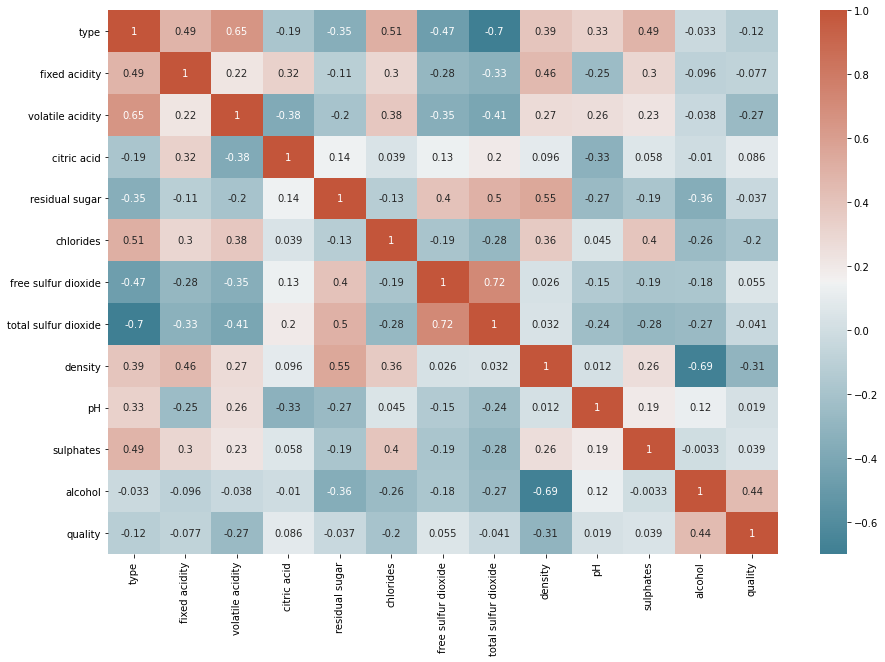

In [11]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Conclusion
***Alcohol*** compared to other features are highly correlated with wine quality *one of the most important feature*

The ***free sulfur dioxide*** and ***total sulfur dioxide*** are highly correlated, which we can also conclude from their names.

On the other hand, ***density*** and ***alcohol*** is negative correlated.

# Checking the outliers

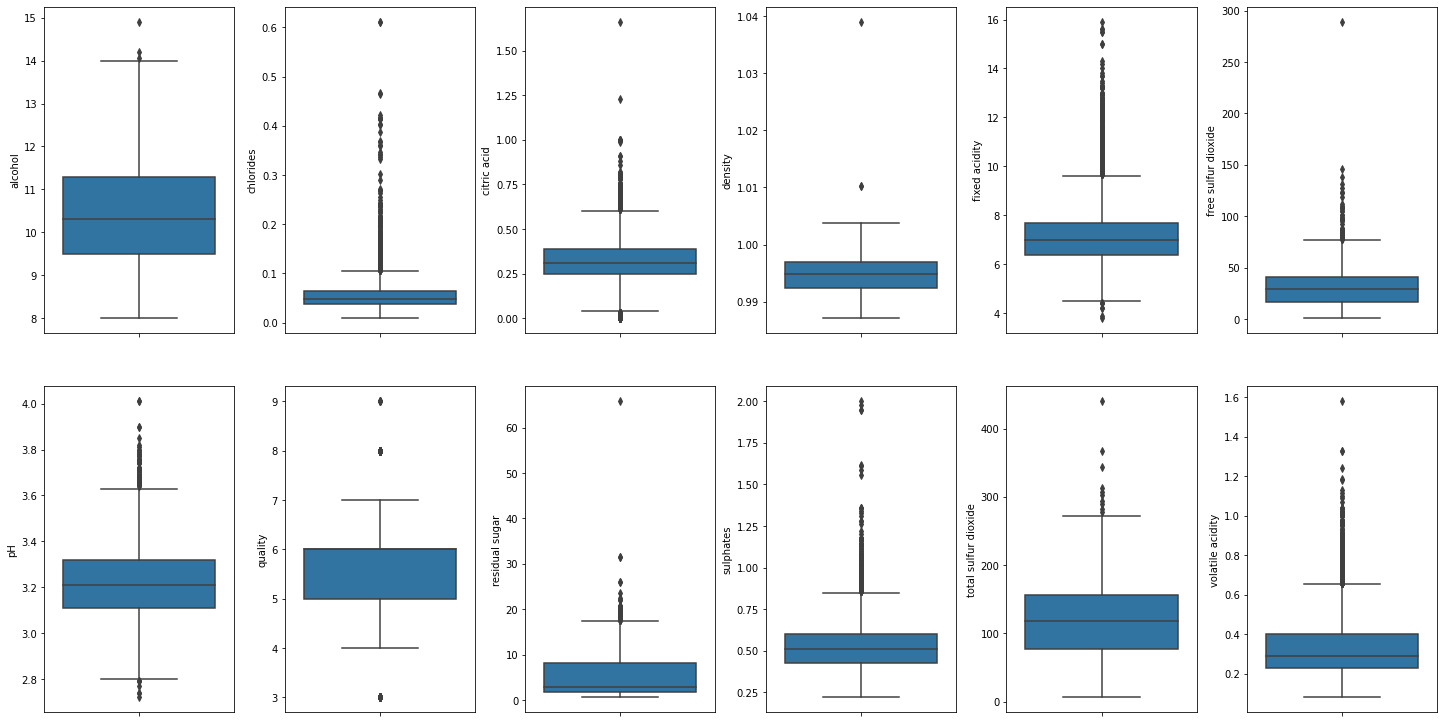

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df[df.columns.difference(['type'])].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

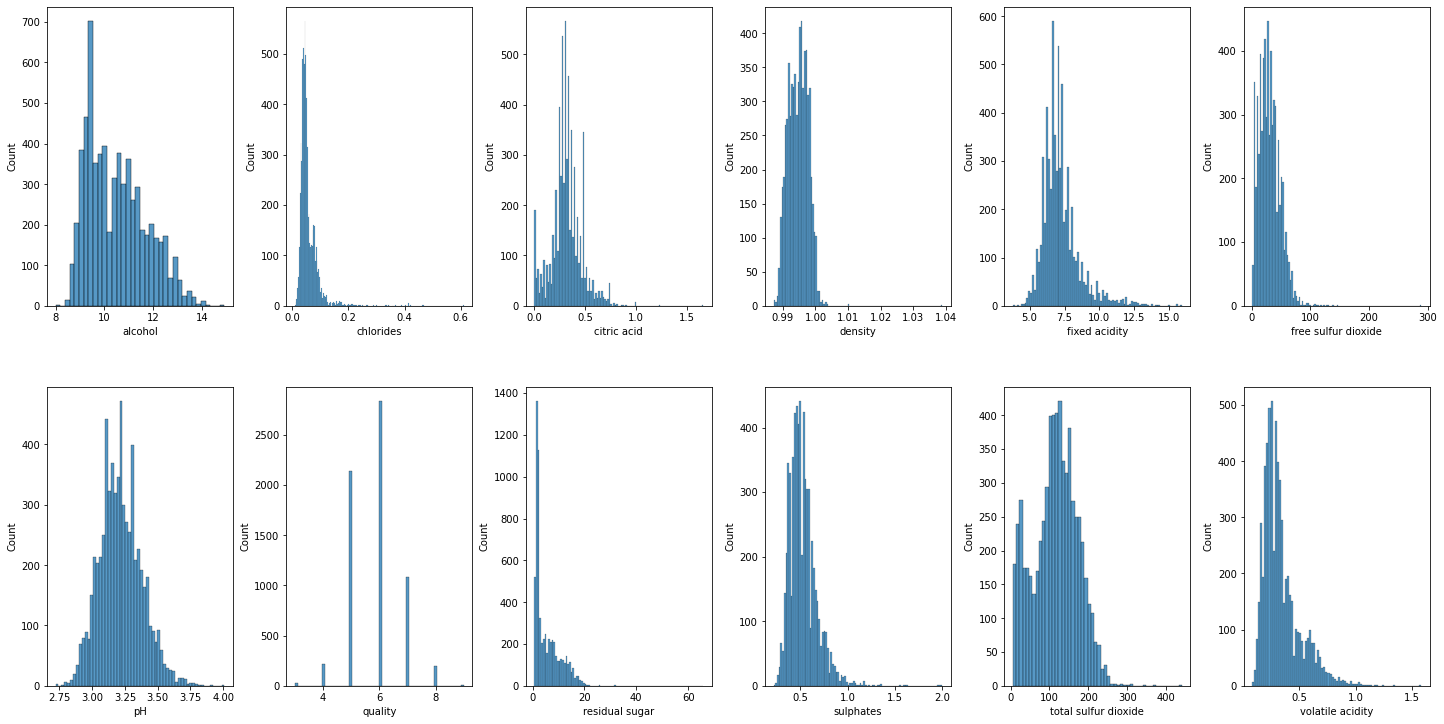

In [13]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df[df.columns.difference(['type'])].items():
    sns.histplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Conclusion
The data has many outliers. We need to check how the model performance is changing based on removing or keeping these points.

# Trying models after removing correlated features and outliers

In [14]:
cd ..

/home/hrach2003/Projects/HTI_ML/WineQuality/WineQualityML/src


In [15]:
from utils import classify, drop_outliers

In [16]:
df.drop(['type', 'free sulfur dioxide', 'density'], axis=1, inplace=True)
for col in df.columns.difference(['quality']):
    drop_outliers(df, col)

## Conclusion
Actually removing these fields decreases model's score

# Oversampling data

In [29]:

X = df.drop(['quality', 'type'], axis=1)
y = df['quality']

In [30]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X, y = oversample.fit_resample(X, y)

In [31]:
cleaned_df = pd.concat([X, y], axis=1)

# Trying to visualize the data reducing the dimentions with PCA.

In [32]:
from sklearn.decomposition import PCA
import plotly.express as px

In [33]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0, y=1, z=2, color=y)
fig.show()
print(total_var)
print(list(zip(('x', 'y', 'z'), pca.explained_variance_ratio_)))


99.92988349767855
[('x', 0.9397392350020487), ('y', 0.056342574546802006), ('z', 0.0032170254279348096)]


## Conclusion
1. Now we can see some strict lines, but overall the classification of ***quality value*** is not fully clear.
2. High ***total_val*** says that we do not lose any information and it is a good reason for simplifying data.
3. Our data is ready for the next step!

# Trying different models to prove the previous steps.

In [34]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=1)
classify(model1, X, y)

Accuracy: 89.34777134223117
CV Score: 82.57107606976778
              precision    recall  f1-score   support

           3       1.00      0.99      1.00       581
           4       0.99      0.92      0.95       607
           5       0.76      0.81      0.79       537
           6       0.64      0.75      0.69       492
           7       0.88      0.80      0.84       616
           8       0.98      0.96      0.97       613
           9       1.00      1.00      1.00       525

    accuracy                           0.89      3971
   macro avg       0.89      0.89      0.89      3971
weighted avg       0.90      0.89      0.90      3971



(89.34777134223117, 82.57107606976778, array([6, 4, 5, ..., 8, 8, 3]))

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
model2 = ExtraTreesClassifier(random_state=1)
classify(model2, X, y) 

Accuracy: 90.05288340468395
CV Score: 83.59865574533757
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       578
           4       0.99      0.93      0.96       603
           5       0.79      0.81      0.80       557
           6       0.64      0.77      0.70       477
           7       0.90      0.81      0.85       619
           8       0.99      0.97      0.98       611
           9       1.00      1.00      1.00       526

    accuracy                           0.90      3971
   macro avg       0.90      0.90      0.90      3971
weighted avg       0.91      0.90      0.90      3971



(90.05288340468395, 83.59865574533757, array([6, 4, 5, ..., 8, 7, 3]))

In [36]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=1)
classify(model3, X, y)

Accuracy: 81.81818181818183
CV Score: 75.29224281583039
              precision    recall  f1-score   support

           3       0.98      0.96      0.97       583
           4       0.89      0.87      0.88       583
           5       0.67      0.69      0.68       552
           6       0.57      0.60      0.58       538
           7       0.75      0.72      0.74       589
           8       0.88      0.88      0.88       601
           9       1.00      1.00      1.00       525

    accuracy                           0.82      3971
   macro avg       0.82      0.82      0.82      3971
weighted avg       0.82      0.82      0.82      3971



(81.81818181818183, 75.29224281583039, array([7, 4, 5, ..., 8, 8, 3]))

In [37]:
from sklearn.neighbors import KNeighborsClassifier 
model4 = KNeighborsClassifier(n_neighbors=int((len(y))**0.5))
classify(model4, X, y)

Accuracy: 47.99798539410728
CV Score: 47.24967855745084
              precision    recall  f1-score   support

           3       0.81      0.57      0.67       819
           4       0.53      0.46      0.49       652
           5       0.24      0.40      0.30       344
           6       0.06      0.25      0.09       132
           7       0.19      0.34      0.25       325
           8       0.59      0.46      0.52       758
           9       0.96      0.54      0.69       941

    accuracy                           0.48      3971
   macro avg       0.48      0.43      0.43      3971
weighted avg       0.63      0.48      0.53      3971



(47.99798539410728, 47.24967855745084, array([3, 4, 9, ..., 8, 9, 3]))

## Conclusion
*80-89* results are pretty good for finishing EDA

# Saving the cleaned dataframe.

In [38]:
cleaned_df.to_csv('./data/wineQuality(cleaned).csv', index=False)

In [39]:
cleaned_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6